## Compare the reconstruction of buoyancy by different restoring times

In [1]:
# load modules 
import numpy as np
import xarray as xr
#from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
from matplotlib import colors, ticker, cm
from matplotlib.colors import LogNorm
%matplotlib inline
import os 
from xgcm import Grid, generate_grid_ds

In [2]:
params = {
   'axes.labelsize': 12,
   'font.size': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
plt.rcParams.update(params)

In [3]:
Lcoarse = 50e3

In [4]:
Model_Tav = xr.open_dataset('./outputs_ncfiles/Model_Tav.nc')
Trac_Tav = xr.open_dataset('./outputs_ncfiles/Trac_Tav.nc')

In [5]:
Trac_coarse = xr.open_dataset('./outputs_ncfiles/Trac_coarse_'+str(int(Lcoarse//1e3))+'km')
Vels_coarse = xr.open_dataset('./outputs_ncfiles/Vels_coarse_'+str(int(Lcoarse//1e3))+'km')
T_coarse    = xr.open_dataset('./outputs_ncfiles/T_coarse_'+str(int(Lcoarse//1e3))+'km')

In [6]:
#diff_tensor_3 = xr.open_dataset('./outputs_ncfiles/diff_tensor_'+str(int(Lcoarse//1e3))+'km.nc')
diff_tensor_2 = xr.open_dataset('./outputs_ncfiles/diff_tensor_2D_'+str(int(Lcoarse//1e3))+'km.nc')

In [7]:
Xcoarse = T_coarse.XCcoarse.data
Ycoarse = T_coarse.YCcoarse.data
Z = T_coarse.Z.data

Ypcol = np.append(Ycoarse, Ycoarse[-1]+Lcoarse)-Lcoarse/2
Xpcol = np.append(Xcoarse, Xcoarse[-1]+Lcoarse)-Lcoarse/2
Zpcol = np.append(Z, Z[-1])

In [19]:
[Yg, Zg] = np.meshgrid(Ycoarse, Z)

In [8]:
diff_tensor_2

<xarray.Dataset>
Dimensions:        (YCcoarse: 40, Z: 40, i: 2, ii: 2, j: 2, k: 2)
Coordinates:
  * Z              (Z) float32 -5.0 -15.0 -25.0 ... -2727.5 -2830.5 -2933.5
  * YCcoarse       (YCcoarse) float32 25000.0 75000.0 ... 1925000.0 1975000.0
    PHrefC         (Z) float32 ...
    drF            (Z) float32 ...
Dimensions without coordinates: i, ii, j, k
Data variables:
    Kfast          (Z, YCcoarse, i, j) float32 ...
    Kslow          (Z, YCcoarse, i, j) float32 ...
    Kcorr          (Z, YCcoarse, i, j) float32 ...
    ST             (Z, YCcoarse, i, j) float32 ...
    AT             (Z, YCcoarse, i, j) float32 ...
    eigvalsST      (Z, YCcoarse, ii) float32 ...
    eigvecsST      (Z, YCcoarse, k, ii) float32 ...
    STfast         (Z, YCcoarse, i, j) float32 ...
    ATfast         (Z, YCcoarse, i, j) float32 ...
    eigvalsSTfast  (Z, YCcoarse, ii) float32 ...
    eigvecsSTfast  (Z, YCcoarse, k, ii) float32 ...
    STslow         (Z, YCcoarse, i, j) float32 ...
    ATslow

### Compare sym parts 

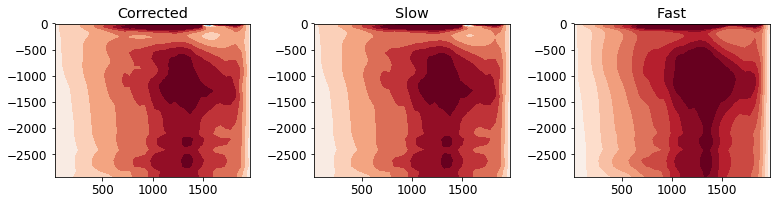

In [16]:
## zonally averaged 3D

fig, ax = plt.subplots(1,4, figsize=(11,3.))

im = ax[0].contourf(Ycoarse/1e3, Z, diff_tensor_2.eigvalsST.isel(ii=1), 
                    vmin=-5e3, vmax=5e3, levels=20, cmap='RdBu_r')
ax[0].set_title('Corrected')
#diff_tensor_3.eigvalsST.isel(ii=2).mean('XCcoarse').plot(vmin=-3e4)
#fig.colorbar(im,format='%.0e')

im = ax[1].contourf(Ycoarse/1e3, Z, diff_tensor_2.eigvalsSTslow.isel(ii=1), 
                    vmin=-5e3,vmax=5e3, levels=20, cmap='RdBu_r')
ax[1].set_title('Slow')
#fig.colorbar(im,format='%.0e')


im = ax[2].contourf(Ycoarse/1e3, Z, diff_tensor_2.eigvalsSTfast.isel(ii=1), 
                  vmin=-5e3, vmax=5e3, levels=20, cmap='RdBu_r')
ax[2].set_title('Fast')
#fig.colorbar(im,format='%.0e')



plt.tight_layout()

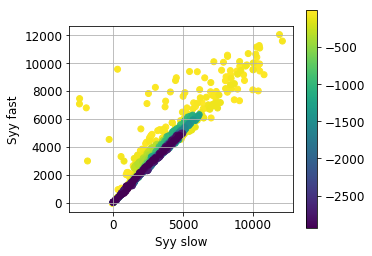

In [110]:
fig, ax = plt.subplots(figsize=(5,4))
im = ax.scatter(diff_tensor_2.eigvalsSTslow.isel(ii=1), diff_tensor_2.eigvalsSTfast.isel(ii=1), c=Zg)
fig.colorbar(im)
ax.grid()
ax.set_aspect('equal')
ax.set_xlabel('Syy slow')
ax.set_ylabel('Syy fast')
plt.savefig('2D_compare_Syy.pdf')

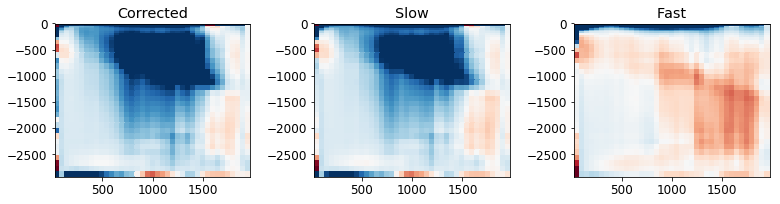

In [41]:
## zonally averaged 3D

fig, ax = plt.subplots(1,3, figsize=(11,3.))

im = ax[0].pcolormesh(Ycoarse/1e3, Z, diff_tensor_2.eigvalsST.isel(ii=0), 
                    vmin=-1e-3, vmax=1e-3, cmap='RdBu_r')
ax[0].set_title('Corrected')
#diff_tensor_3.eigvalsST.isel(ii=2).mean('XCcoarse').plot(vmin=-3e4)
#fig.colorbar(im,format='%.0e')

im = ax[1].pcolormesh(Ycoarse/1e3, Z, diff_tensor_2.eigvalsSTslow.isel(ii=0), 
                    vmin=-1e-3,vmax=1e-3, cmap='RdBu_r')
ax[1].set_title('Slow')
#fig.colorbar(im,format='%.0e')


im = ax[2].pcolormesh(Ycoarse/1e3, Z, diff_tensor_2.eigvalsSTfast.isel(ii=0), 
                  vmin=-1e-3, vmax=1e-3,  cmap='RdBu_r')
ax[2].set_title('Fast')
#fig.colorbar(im,format='%.0e')

plt.tight_layout()


(-1000.0, 12000.0)

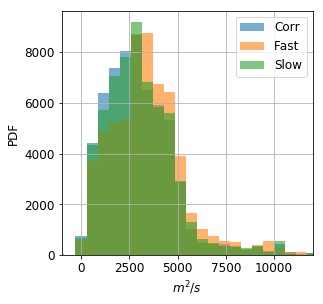

In [33]:
bins = np.linspace(-1e4,3e4,71)
[_,_,_]=diff_tensor_2.eigvalsST.isel(ii=1).where(T_coarse.hFacCcoarse==1.).plot.hist(bins=bins, alpha=0.6, label='Corr')
[_,_,_]=diff_tensor_2.eigvalsSTfast.isel(ii=1).where(T_coarse.hFacCcoarse==1.).plot.hist(bins=bins, alpha=0.6, label='Fast')
[_,_,_]=diff_tensor_2.eigvalsSTslow.isel(ii=1).where(T_coarse.hFacCcoarse==1.).plot.hist(bins=bins, alpha=0.6, label='Slow')

plt.legend()
plt.title('')
plt.xlabel('$m^2/s$')
plt.ylabel('PDF')
plt.grid()
plt.xlim([-1e3, 12e3])

## Compare Asym part

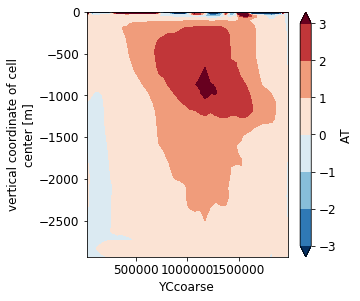

In [45]:
diff_tensor_2.AT.isel(i=0,j=1).plot.contourf(vmin=-3)

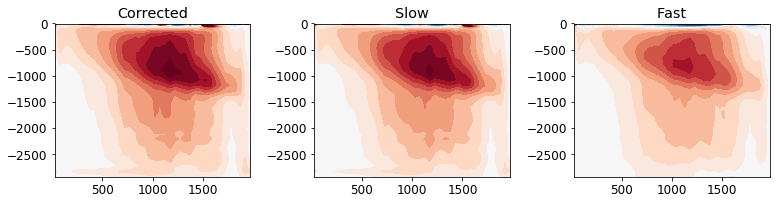

In [49]:
## zonally averaged 3D

fig, ax = plt.subplots(1,3, figsize=(11,3.))

im = ax[0].contourf(Ycoarse/1e3, Z, diff_tensor_2.AT.isel(i=0,j=1), 
                    vmin=-3, vmax=3, levels=np.linspace(-3,3,20), cmap='RdBu_r', extend='both')
ax[0].set_title('Corrected')
#diff_tensor_3.eigvalsST.isel(ii=2).mean('XCcoarse').plot(vmin=-3e4)
#fig.colorbar(im,format='%.0e')

im = ax[1].contourf(Ycoarse/1e3, Z, diff_tensor_2.ATslow.isel(i=0,j=1), 
                    vmin=-3,vmax=3, levels=np.linspace(-3,3,20), cmap='RdBu_r', extend='both')
ax[1].set_title('Slow')
#fig.colorbar(im,format='%.0e')


im = ax[2].contourf(Ycoarse/1e3, Z, diff_tensor_2.ATfast.isel(i=0,j=1), 
                  vmin=-3, vmax=3, levels=np.linspace(-3,3,20), cmap='RdBu_r', extend='both')
ax[2].set_title('Fast')
#fig.colorbar(im,format='%.0e')

plt.tight_layout()

### Reconstruct the Buoyancy Fluxes

In [50]:
fluxT = xr.Dataset({'UpCp':T_coarse.UpTp, 'VpCp':T_coarse.VpTp, 'WpCp':T_coarse.WpTp})
gradT = xr.Dataset({'dCdx':T_coarse.T_X, 'dCdy':T_coarse.T_Y, 'dCdz':T_coarse.T_Z})

In [51]:
def flux_reconstruct_2D(tensor, flux, grads):

    recVflux = -(tensor.sel(i=0, j=0)*grads.dCdy + tensor.sel(i=0, j=1)*grads.dCdz)
    recWflux = -(tensor.sel(i=1, j=0)*grads.dCdy + tensor.sel(i=1, j=1)*grads.dCdz)

    errV = np.abs(flux.VpCp - recVflux)/np.abs(flux.VpCp)
    errW = np.abs(flux.WpCp - recWflux)/np.abs(flux.WpCp)
    
    flux_rec=xr.Dataset({'VpCp':recVflux, 'WpCp':recWflux,
                                'errV':errV, 'errW':errW})
    
    return flux_rec

In [54]:
frbKcorr = flux_reconstruct_2D(diff_tensor_2.Kcorr, fluxT.mean('XCcoarse'), gradT.mean('XCcoarse'))
frbKslow = flux_reconstruct_2D(diff_tensor_2.Kslow, fluxT.mean('XCcoarse'), gradT.mean('XCcoarse'))
frbKfast = flux_reconstruct_2D(diff_tensor_2.Kfast, fluxT.mean('XCcoarse'), gradT.mean('XCcoarse'))

In [55]:
frbScorr = flux_reconstruct_2D(diff_tensor_2.ST, fluxT.mean('XCcoarse'), gradT.mean('XCcoarse'))
frbAcorr = flux_reconstruct_2D(diff_tensor_2.AT, fluxT.mean('XCcoarse'), gradT.mean('XCcoarse'))
frbSfast = flux_reconstruct_2D(diff_tensor_2.STfast, fluxT.mean('XCcoarse'), gradT.mean('XCcoarse'))
frbAfast = flux_reconstruct_2D(diff_tensor_2.ATfast, fluxT.mean('XCcoarse'), gradT.mean('XCcoarse'))
frbSslow = flux_reconstruct_2D(diff_tensor_2.STslow, fluxT.mean('XCcoarse'), gradT.mean('XCcoarse'))
frbAslow = flux_reconstruct_2D(diff_tensor_2.ATslow, fluxT.mean('XCcoarse'), gradT.mean('XCcoarse'))

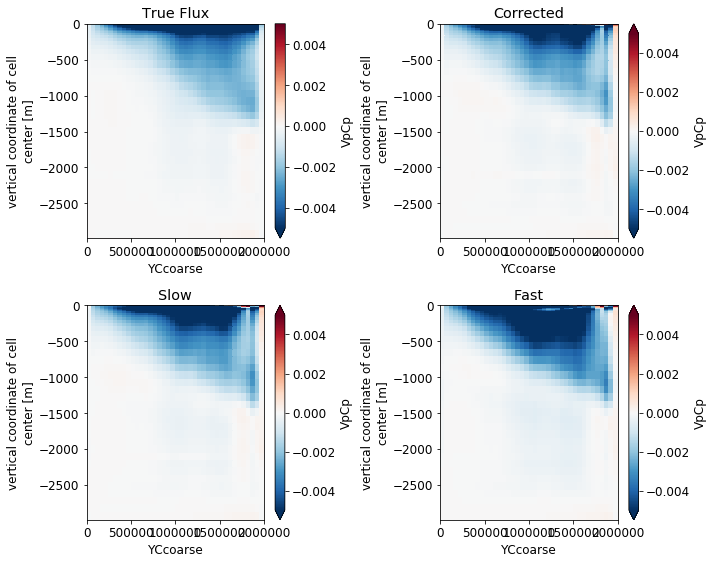

In [66]:
plt.figure(figsize=(10,8))
plt.subplot(221)
fluxT.VpCp.mean('XCcoarse').plot(vmin=-5e-3)
plt.title('True Flux')

plt.subplot(222)
frbKcorr.VpCp.plot(vmin=-5e-3)
plt.title('Corrected')

plt.subplot(223)
frbKslow.VpCp.plot(vmin=-5e-3)
plt.title('Slow')

plt.subplot(224)
frbKfast.VpCp.plot(vmin=-5e-3)
plt.title('Fast')

plt.tight_layout()
plt.savefig('2D_Compare_restoring_full.pdf')

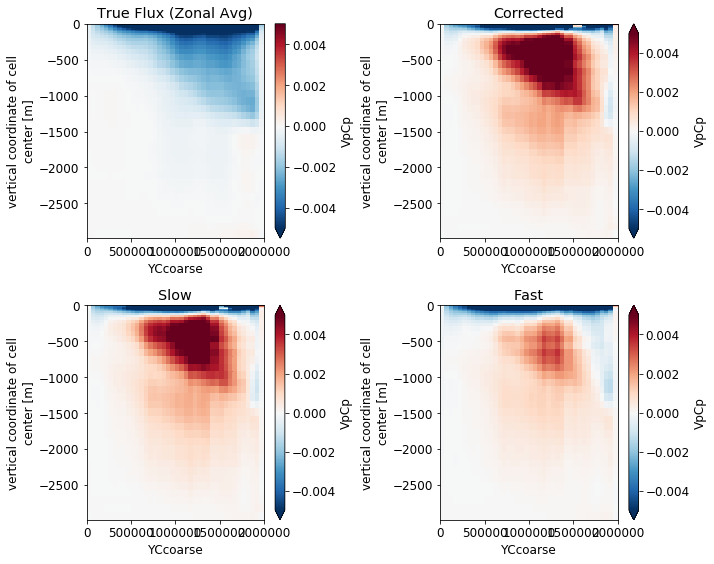

In [67]:
plt.figure(figsize=(10,8))
plt.subplot(221)
fluxT.VpCp.mean('XCcoarse').plot(vmin=-5e-3)
plt.title('True Flux (Zonal Avg)')

plt.subplot(222)
frbScorr.VpCp.plot(vmin=-5e-3)
plt.title('Corrected')

plt.subplot(223)
frbSslow.VpCp.plot(vmin=-5e-3)
plt.title('Slow')

plt.subplot(224)
frbSfast.VpCp.plot(vmin=-5e-3)
plt.title('Fast')

plt.tight_layout()
plt.savefig('2D_Compare_restoring_sym.pdf')

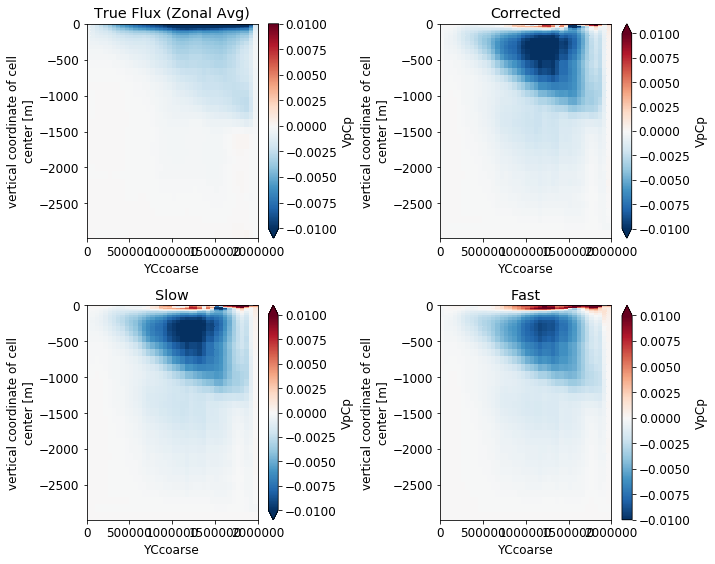

In [68]:
plt.figure(figsize=(10,8))
plt.subplot(221)
fluxT.VpCp.mean('XCcoarse').plot(vmin=-10e-3)
plt.title('True Flux (Zonal Avg)')

plt.subplot(222)
frbAcorr.VpCp.plot(vmin=-10e-3)
plt.title('Corrected')

plt.subplot(223)
frbAslow.VpCp.plot(vmin=-10e-3)
plt.title('Slow')

plt.subplot(224)
frbAfast.VpCp.plot(vmin=-10e-3)
plt.title('Fast')

plt.tight_layout()
plt.savefig('2D_Compare_restoring_asym.pdf')

### How do the mixing slopes compare?

In [71]:
vy = diff_tensor_2.eigvecsST.isel(ii=1, k=0)
vz = diff_tensor_2.eigvecsST.isel(ii=1, k=1)

In [73]:
T_coarse_2D = T_coarse.mean('XCcoarse')

In [75]:
S_iso = -T_coarse_2D.T_Y / T_coarse_2D.T_Z
S_mix_corr = vz / vy

In [76]:
vy = diff_tensor_2.eigvecsSTfast.isel(ii=1, k=0)
vz = diff_tensor_2.eigvecsSTfast.isel(ii=1, k=1)
S_mix_fast = vz / vy

In [77]:
vy = diff_tensor_2.eigvecsSTslow.isel(ii=1, k=0)
vz = diff_tensor_2.eigvecsSTslow.isel(ii=1, k=1)
S_mix_slow = vz / vy

Text(0, 0.5, 'Z (m)')

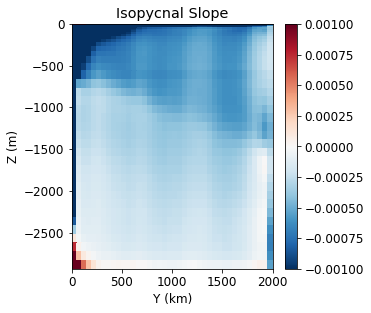

In [78]:
plt.pcolormesh(Ypcol/1e3, Zpcol, S_iso, vmin=-0.001, vmax = 0.001, cmap='RdBu_r')
plt.title('Isopycnal Slope')
plt.colorbar()
plt.xlabel('Y (km)')
plt.ylabel('Z (m)')

Text(0, 0.5, 'Z (m)')

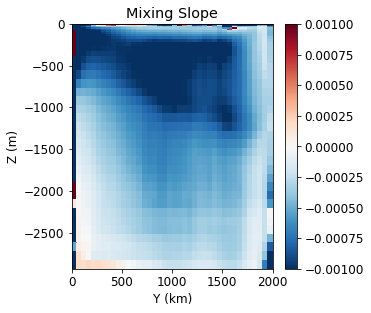

In [79]:
plt.pcolormesh(Ypcol/1e3, Zpcol, S_mix_corr, vmin=-0.001, vmax = 0.001, cmap='RdBu_r')
plt.title('Mixing Slope')
plt.colorbar()
plt.xlabel('Y (km)')
plt.ylabel('Z (m)')

Text(0, 0.5, 'Z (m)')

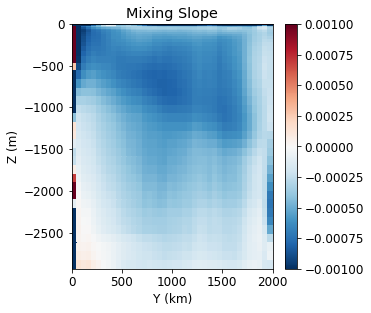

In [81]:
plt.pcolormesh(Ypcol/1e3, Zpcol, S_mix_fast, vmin=-0.001, vmax = 0.001, cmap='RdBu_r')
plt.title('Mixing Slope')
plt.colorbar()
plt.xlabel('Y (km)')
plt.ylabel('Z (m)')

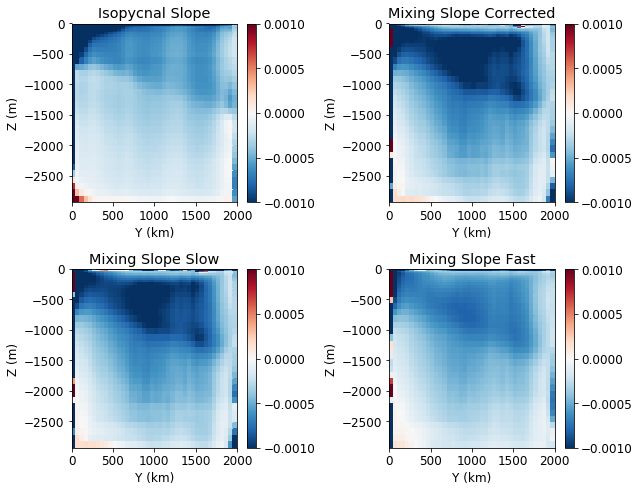

In [84]:
plt.figure(figsize=(9,7))

plt.subplot(221)
plt.pcolormesh(Ypcol/1e3, Zpcol, S_iso, vmin=-0.001, vmax = 0.001, cmap='RdBu_r')
plt.title('Isopycnal Slope')
plt.colorbar()
plt.xlabel('Y (km)')
plt.ylabel('Z (m)')

plt.subplot(222)
plt.pcolormesh(Ypcol/1e3, Zpcol, S_mix_corr, vmin=-0.001, vmax = 0.001, cmap='RdBu_r')
plt.title('Mixing Slope Corrected')
plt.colorbar()
plt.xlabel('Y (km)')
plt.ylabel('Z (m)')

plt.subplot(223)
plt.pcolormesh(Ypcol/1e3, Zpcol, S_mix_slow , vmin=-0.001, vmax = 0.001, cmap='RdBu_r')
plt.title('Mixing Slope Slow')
plt.colorbar()
plt.xlabel('Y (km)')
plt.ylabel('Z (m)')

plt.subplot(224)
plt.pcolormesh(Ypcol/1e3, Zpcol, S_mix_fast , vmin=-0.001, vmax = 0.001, cmap='RdBu_r')
plt.title('Mixing Slope Fast')
plt.colorbar()
plt.xlabel('Y (km)')
plt.ylabel('Z (m)')

plt.tight_layout()
plt.savefig('2D_slopes_diff_restore.pdf')

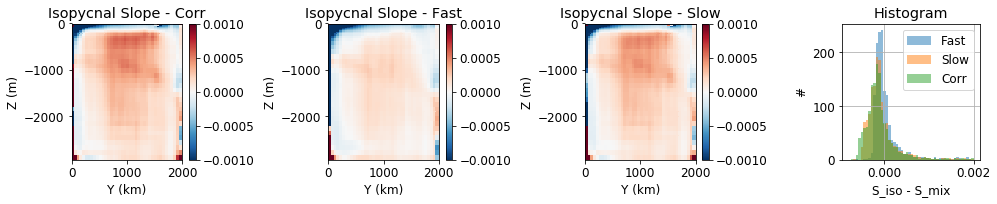

In [108]:
plt.figure(figsize=(14,3))

plt.subplot(141)
plt.pcolormesh(Ypcol/1e3, Zpcol, (S_iso- S_mix_corr) , vmin=-0.001, vmax = 0.001, cmap='RdBu_r')
plt.title('Isopycnal Slope - Corr')
plt.colorbar()
plt.xlabel('Y (km)')
plt.ylabel('Z (m)')

plt.subplot(142)
plt.pcolormesh(Ypcol/1e3, Zpcol, (S_iso- S_mix_fast), vmin=-0.001, vmax = 0.001, cmap='RdBu_r')
plt.title('Isopycnal Slope - Fast')
plt.colorbar()
plt.xlabel('Y (km)')
plt.ylabel('Z (m)')

plt.subplot(143)
plt.pcolormesh(Ypcol/1e3, Zpcol, (S_iso- S_mix_slow), vmin=-0.001, vmax = 0.001, cmap='RdBu_r')
plt.title('Isopycnal Slope - Slow')
plt.colorbar()
plt.xlabel('Y (km)')
plt.ylabel('Z (m)')

plt.subplot(144)
bins = np.linspace(-8e-4, 2e-3, 51)
[_,_,_] = (S_mix_fast-S_iso).plot.hist(bins=bins, label='Fast', alpha = 0.5)
[_,_,_] = (S_mix_slow-S_iso).plot.hist(bins=bins, label='Slow', alpha = 0.5)
[_,_,_] = (S_mix_corr-S_iso).plot.hist(bins=bins, label='Corr', alpha = 0.5)

plt.legend()
plt.xlabel('S_iso - S_mix')
plt.grid()
plt.ylabel('#')

plt.tight_layout()
plt.savefig('2D_slopes_diff_anomalies.pdf')

Text(0, 0.5, '#')

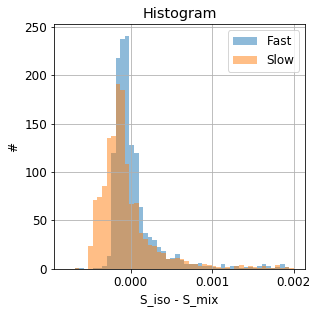

In [106]:
bins = np.linspace(-8e-4, 2e-3, 51)
[_,_,_] = (S_mix_fast-S_iso).plot.hist(bins=bins, label='Fast', alpha = 0.5)
[_,_,_] = (S_mix_slow-S_iso).plot.hist(bins=bins, label='Slow', alpha = 0.5)
plt.legend()
plt.xlabel('S_iso - S_mix')
plt.grid()
plt.ylabel('#')

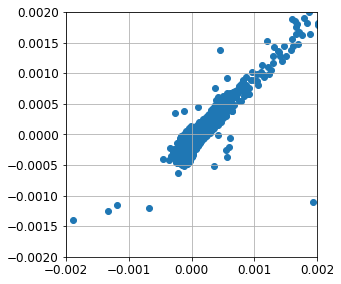

In [92]:
plt.scatter( (S_mix_fast-S_iso), (S_mix_slow-S_iso) )
plt.xlim([-2e-3, 2e-3])
plt.ylim([-2e-3, 2e-3])
plt.grid()

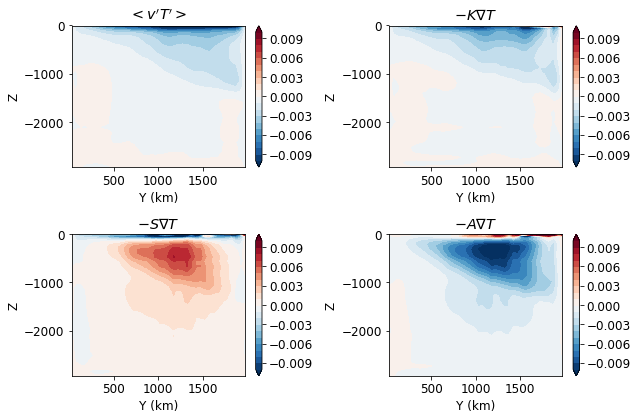

In [172]:
plt.figure(figsize=(9,6))
plt.subplot(221)
plt.contourf(Ycoarse/1e3, Z, fluxT.VpCp.mean('XCcoarse'), vmin=-10e-3, vmax=10e-3, levels=np.linspace(-10e-3, 10e-3,21), cmap='RdBu_r', extend='both')
plt.title(r'$<v^\prime T^\prime>$')
plt.ylabel('Z')
plt.xlabel('Y (km)')
plt.colorbar()

plt.subplot(223)
plt.contourf(Ycoarse/1e3, Z, frbS2.VpCp, vmin=-10e-3, vmax=10e-3, levels=np.linspace(-10e-3, 10e-3,21), cmap='RdBu_r', extend='both')
plt.title(r'$-S\nabla T$')
plt.ylabel('Z')
plt.xlabel('Y (km)')
plt.colorbar()

plt.subplot(224)
plt.contourf(Ycoarse/1e3, Z, frbA2.VpCp, vmin=-10e-3, vmax=10e-3, levels=np.linspace(-10e-3, 10e-3,21), cmap='RdBu_r', extend='both')
plt.title(r'$-A\nabla T$')
plt.ylabel('Z')
plt.xlabel('Y (km)')
plt.colorbar()


plt.subplot(222)
plt.contourf(Ycoarse/1e3, Z, (frbA2.VpCp+frbS2.VpCp), vmin=-10e-3, vmax=10e-3, levels=np.linspace(-10e-3, 10e-3,21), cmap='RdBu_r', extend='both')
plt.title(r'$-K\nabla T$')
plt.ylabel('Z')
plt.xlabel('Y (km)')
plt.colorbar()
plt.tight_layout()
plt.savefig('2D_Tflux.pdf')

(0, 2)

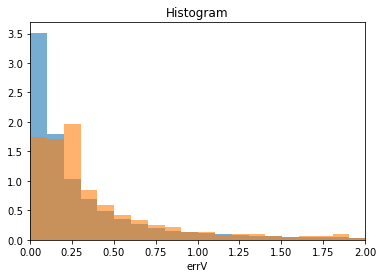

In [95]:
bins = np.linspace(0,30,300)
[_,_,_] = frbK3.errV.plot.hist(bins=bins, density=True, alpha=0.6)
[_,_,_] = frbK2.errV.plot.hist(bins=bins, density=True, alpha=0.6)

plt.xlim([0,2])

Look at $S \nabla B. \nabla B$

In [112]:
Sgbgb3 = frbS3.UpCp* gradT.dCdx + frbS3.VpCp* gradT.dCdy + frbS3.WpCp* gradT.dCdz
Sgbgb2 =  frbS2.VpCp* gradT.dCdy.mean('XCcoarse') + frbS2.WpCp* gradT.dCdz.mean('XCcoarse')

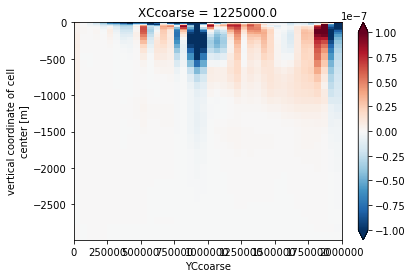

In [122]:
Sgbgb3.sel(XCcoarse=1200e3, method='nearest').plot(vmin=-1e-7)

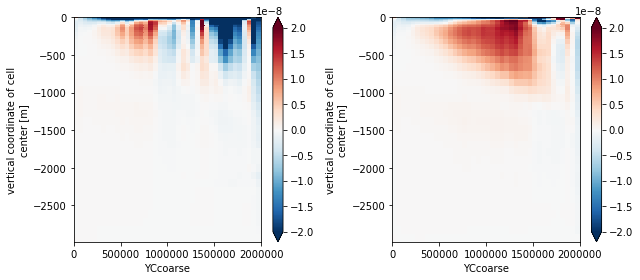

In [120]:
plt.figure(figsize=(9,4))

plt.subplot(121)
Sgbgb3.mean('XCcoarse').plot(vmin=-2e-8)

plt.subplot(122)
Sgbgb2.plot(vmin=-2e-8)

plt.tight_layout()

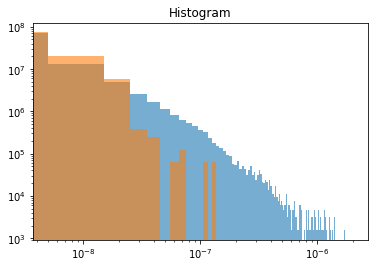

In [140]:
bins = np.linspace(-2e-6, 2e-6, 400)
[_,_,_] = np.abs(Sgbgb3).plot.hist(bins=bins, density=True, alpha=0.6)
[_,_,_] = np.abs(Sgbgb2).plot.hist(bins=bins, density=True, alpha=0.6)
plt.xscale('log')
plt.yscale('log')

In [145]:
print(np.abs(Sgbgb3).mean(['XCcoarse', 'YCcoarse', 'Z']).values)
print(np.abs(Sgbgb2).mean(['YCcoarse', 'Z']).values)

1.3200746e-08
4.4189408e-09


In [146]:
print(np.abs(Sgbgb3).sel(Z=slice(0,-700)).mean(['XCcoarse', 'YCcoarse', 'Z']).values)
print(np.abs(Sgbgb2).sel(Z=slice(0,-700)).mean(['YCcoarse', 'Z']).values)

2.8394416e-08
9.337247e-09
